In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['location'] = df['location'].fillna(df['location'].mode()[0]) # Categorical Column
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())
df['size'] = df['size'].fillna(df['size'].mode()[0]) # Categorical Column

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

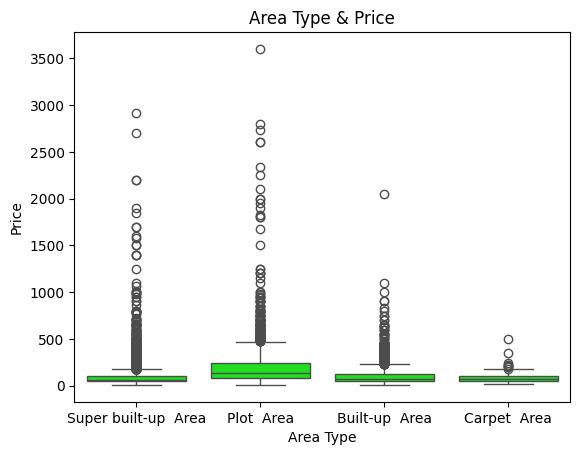

In [8]:
ax = sns.boxplot(x='area_type',y='price',data=df,color='lime')
ax.set_xlabel('Area Type')
ax.set_ylabel('Price')
ax.set_title('Area Type & Price')
plt.show()

In [9]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [10]:
df.drop(columns=['society', 'availability'], axis=1, inplace=True)

In [11]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [12]:
df.drop(columns='size', inplace=True)

In [13]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [16]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [17]:
df['bath'] = df['bath'].astype('int')
df['balcony'] = df['balcony'].astype('int')

# Price per square feet

In [18]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [19]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2,1,51.00,2,4250.000000


In [20]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [21]:
df['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [22]:
df['location'] = df['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
location_count = df.location.value_counts()
location_count

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [23]:
location_count_l10 = location_count[location_count<=10]
location_count_l10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [24]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_l10 else x)

In [25]:
df.location.value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

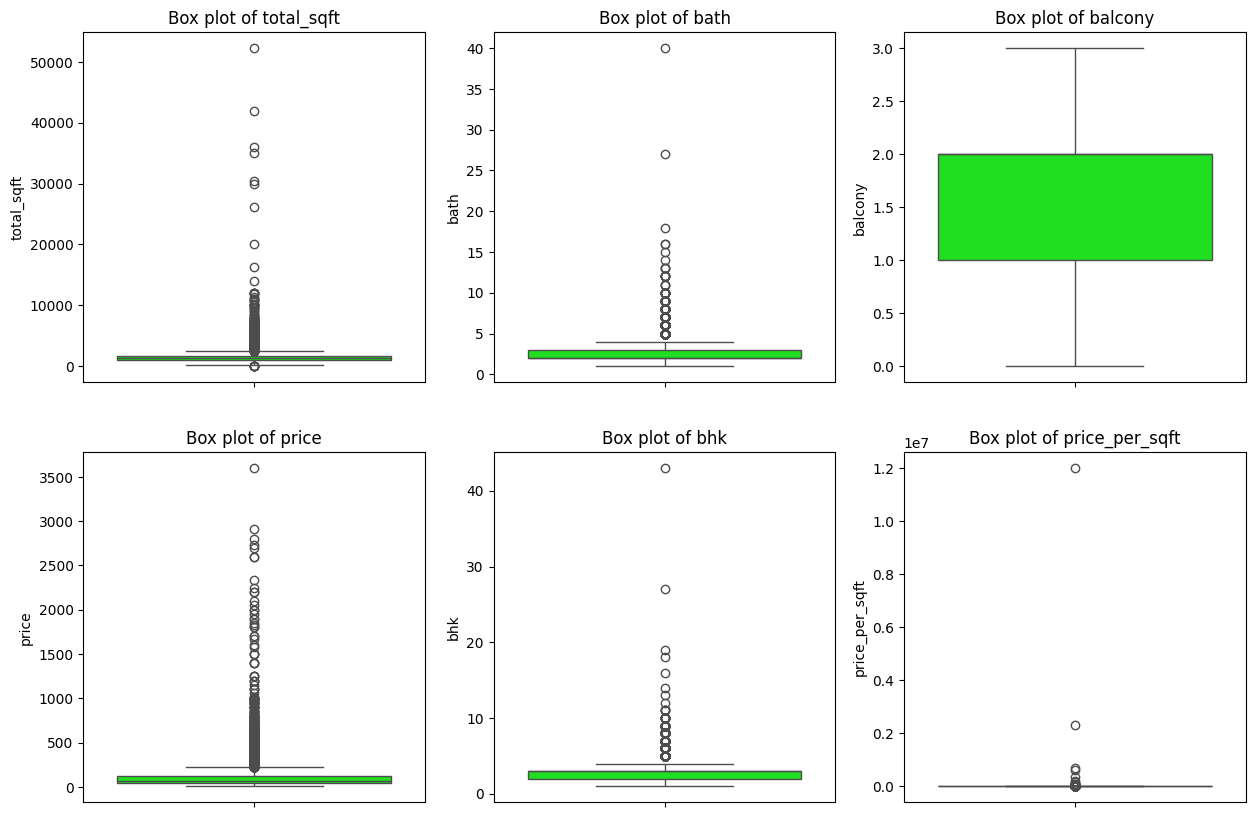

In [26]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col],color='lime')
    plt.title(f'Box plot of {col}')

plt.show()

In [27]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [28]:
numeric_columns.remove('bhk')

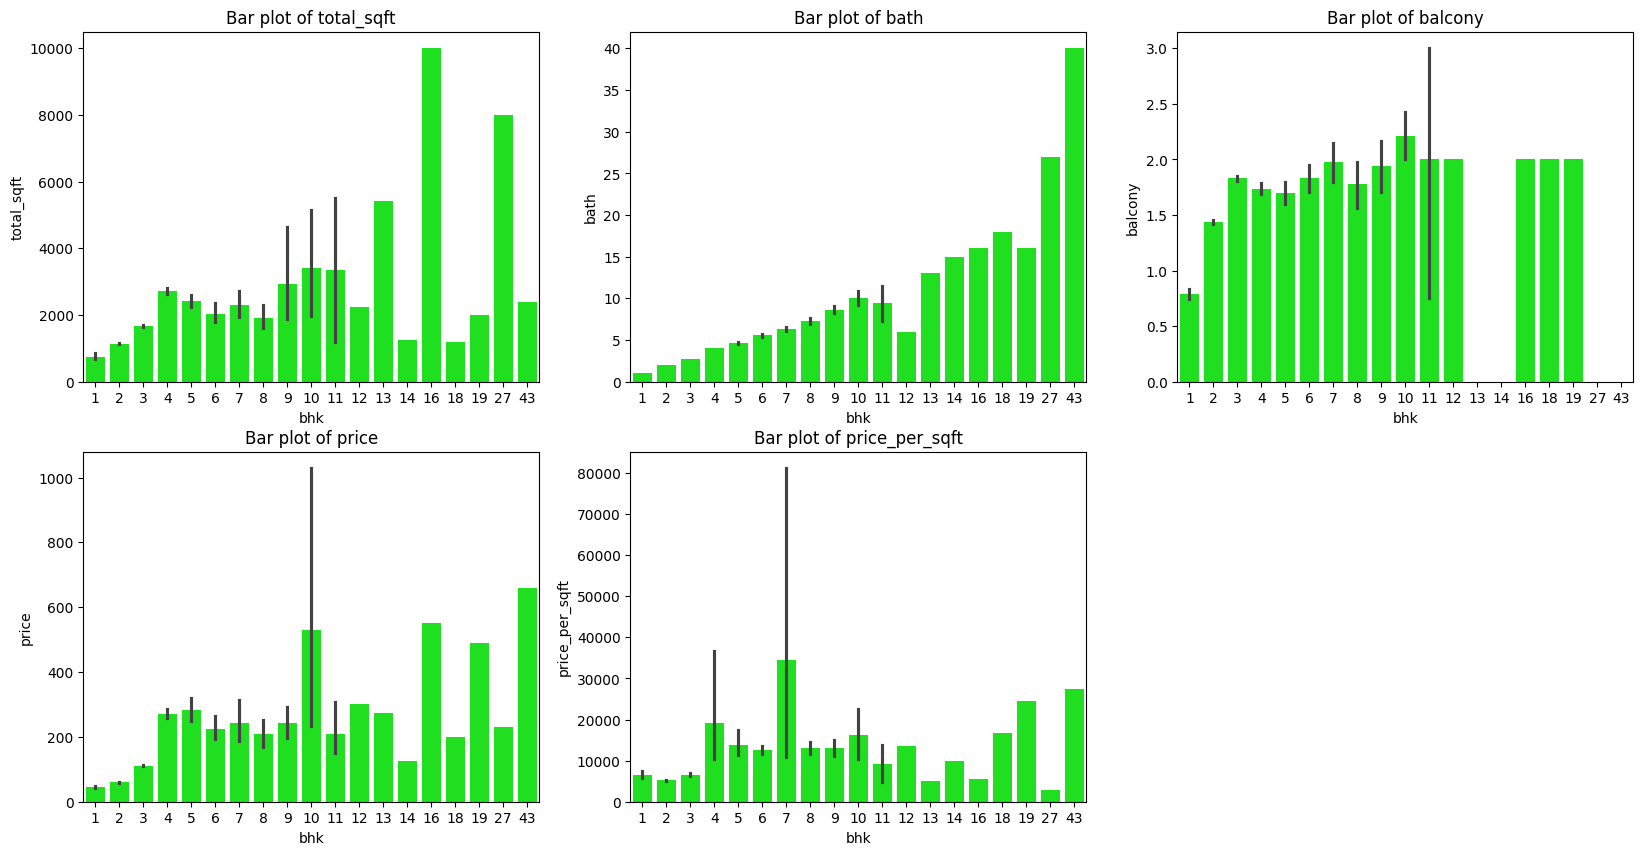

In [29]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=df['bhk'],y=df[col],color='lime')
    plt.title(f'Bar plot of {col}')

<Axes: xlabel='bhk', ylabel='total_sqft'>

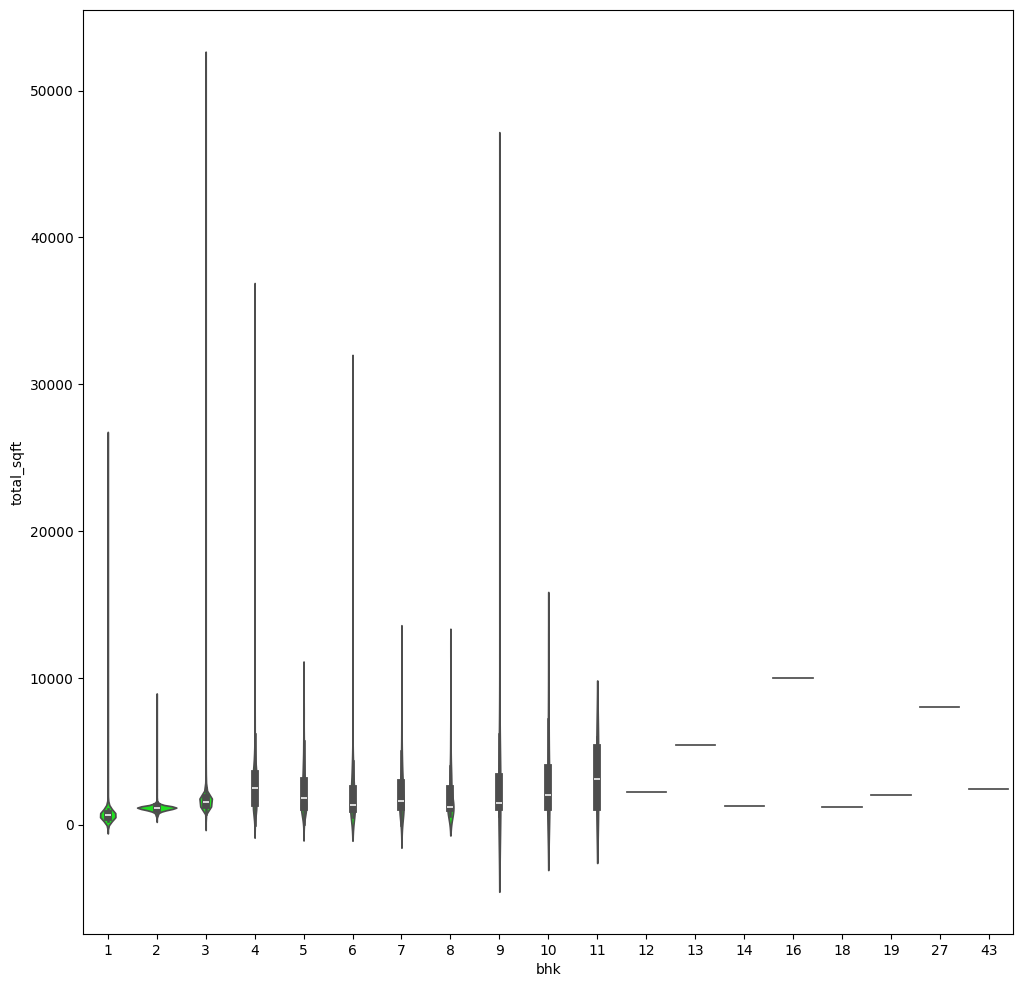

In [30]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['total_sqft'],x=df['bhk'],color='lime')

<Axes: xlabel='bhk', ylabel='bath'>

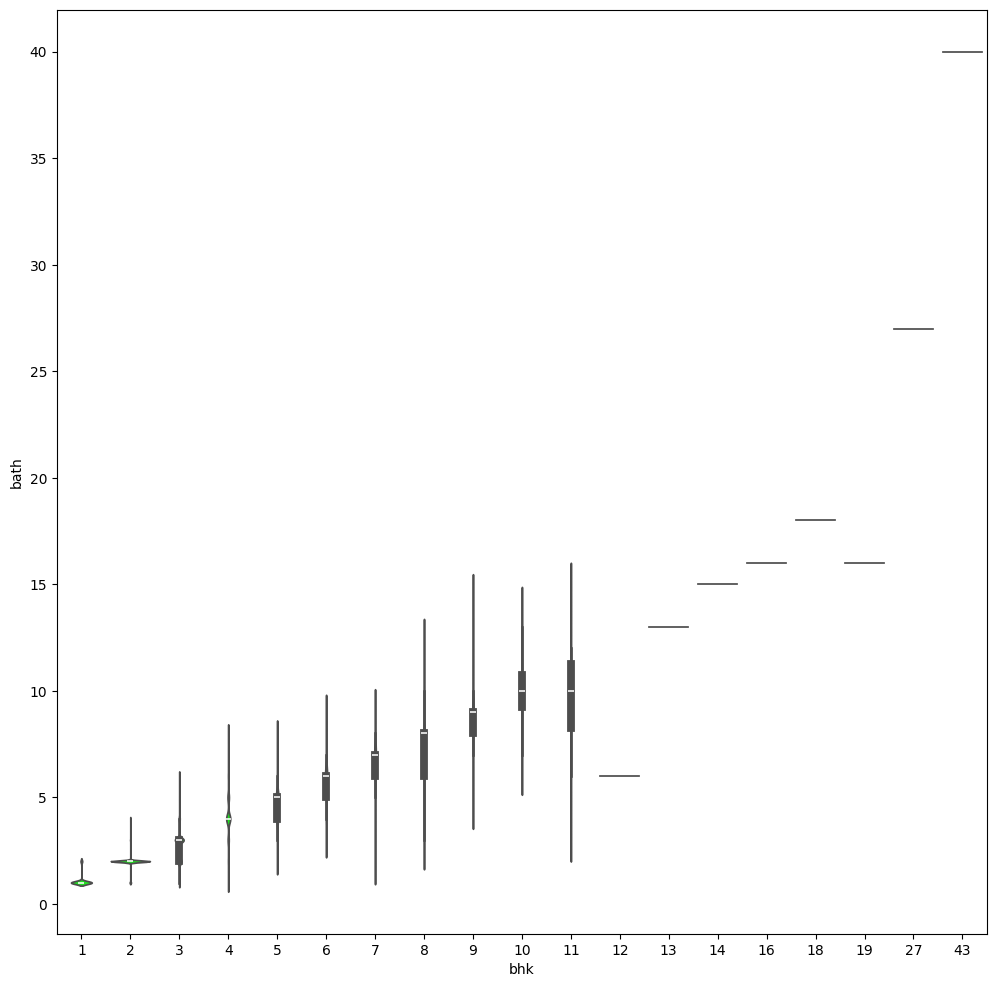

In [31]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['bath'],x=df['bhk'],color='lime')

<Axes: xlabel='bhk', ylabel='balcony'>

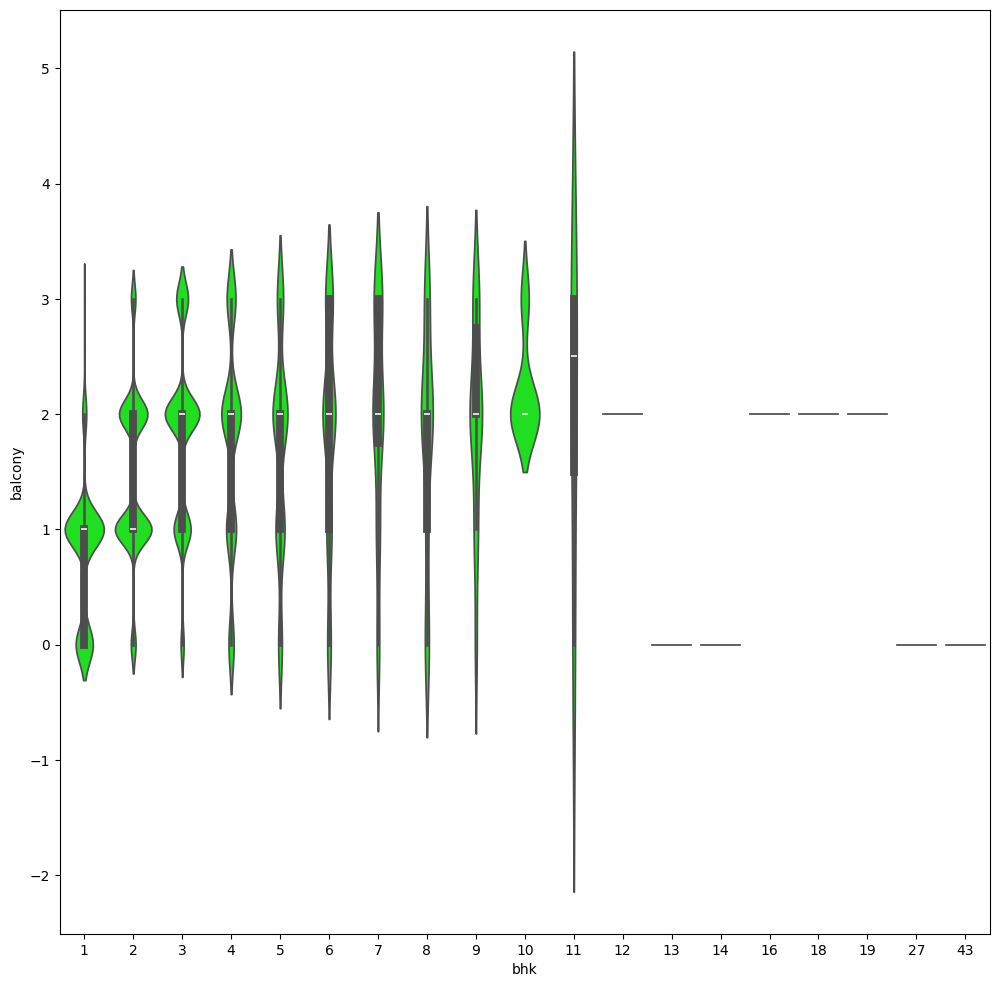

In [32]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['balcony'],x=df['bhk'],color='lime')

<Axes: xlabel='bhk', ylabel='price'>

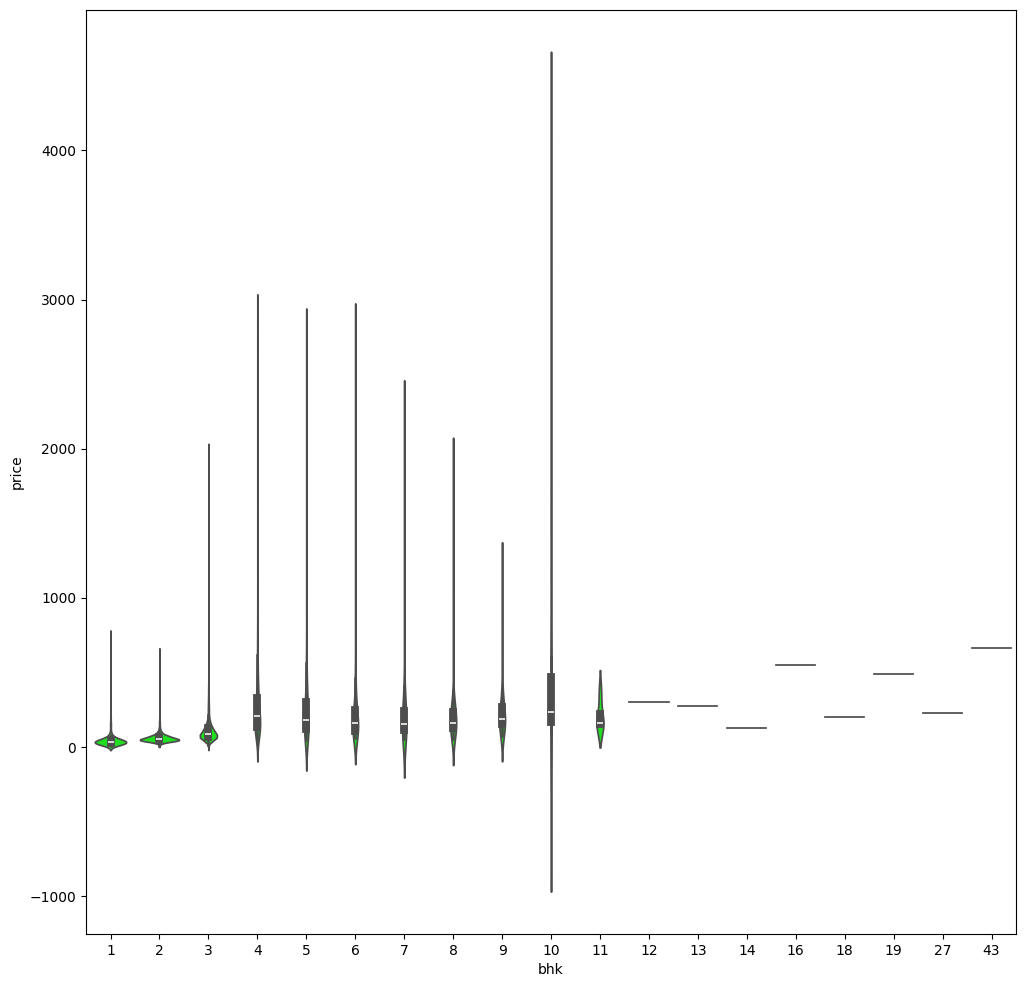

In [33]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['price'],x=df['bhk'],color='lime')

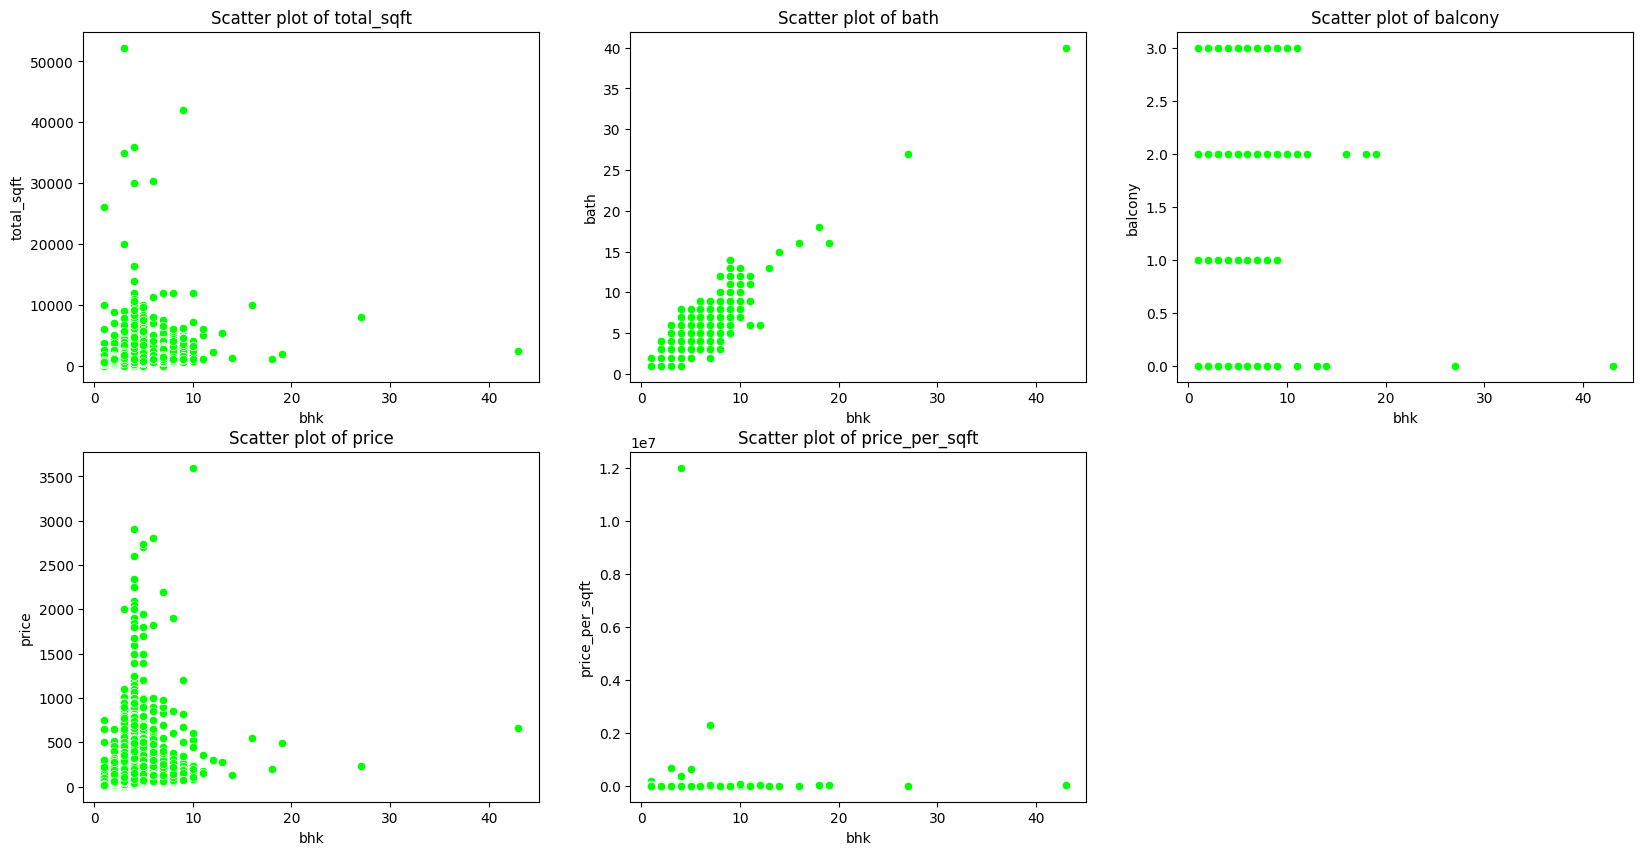

In [34]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df['bhk'],y=df[col],color='lime')
    plt.title(f'Scatter plot of {col}')

In [35]:
df.drop(columns=['area_type'],axis=1,inplace=True)

# Oulier Removal

In [36]:
def remove_outliers_sqft(df):
    new_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        df2=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        new_df=pd.concat([new_df,df2], ignore_index=True)
    return new_df
df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000
mean,1537.976810,2.605066,1.605066,105.238232,2.719185,6303.086658
std,1145.700742,1.208022,0.793965,138.520527,1.152969,3636.502296
min,250.000000,1.000000,0.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4285.714286
50%,1280.000000,2.000000,2.000000,70.000000,3.000000,5311.170467
75%,1660.000000,3.000000,2.000000,110.000000,3.000000,6849.601172
max,52272.000000,27.000000,3.000000,3600.000000,27.000000,53150.000000


In [37]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis=0)

In [38]:
df=bhk_outlier_remover(df)

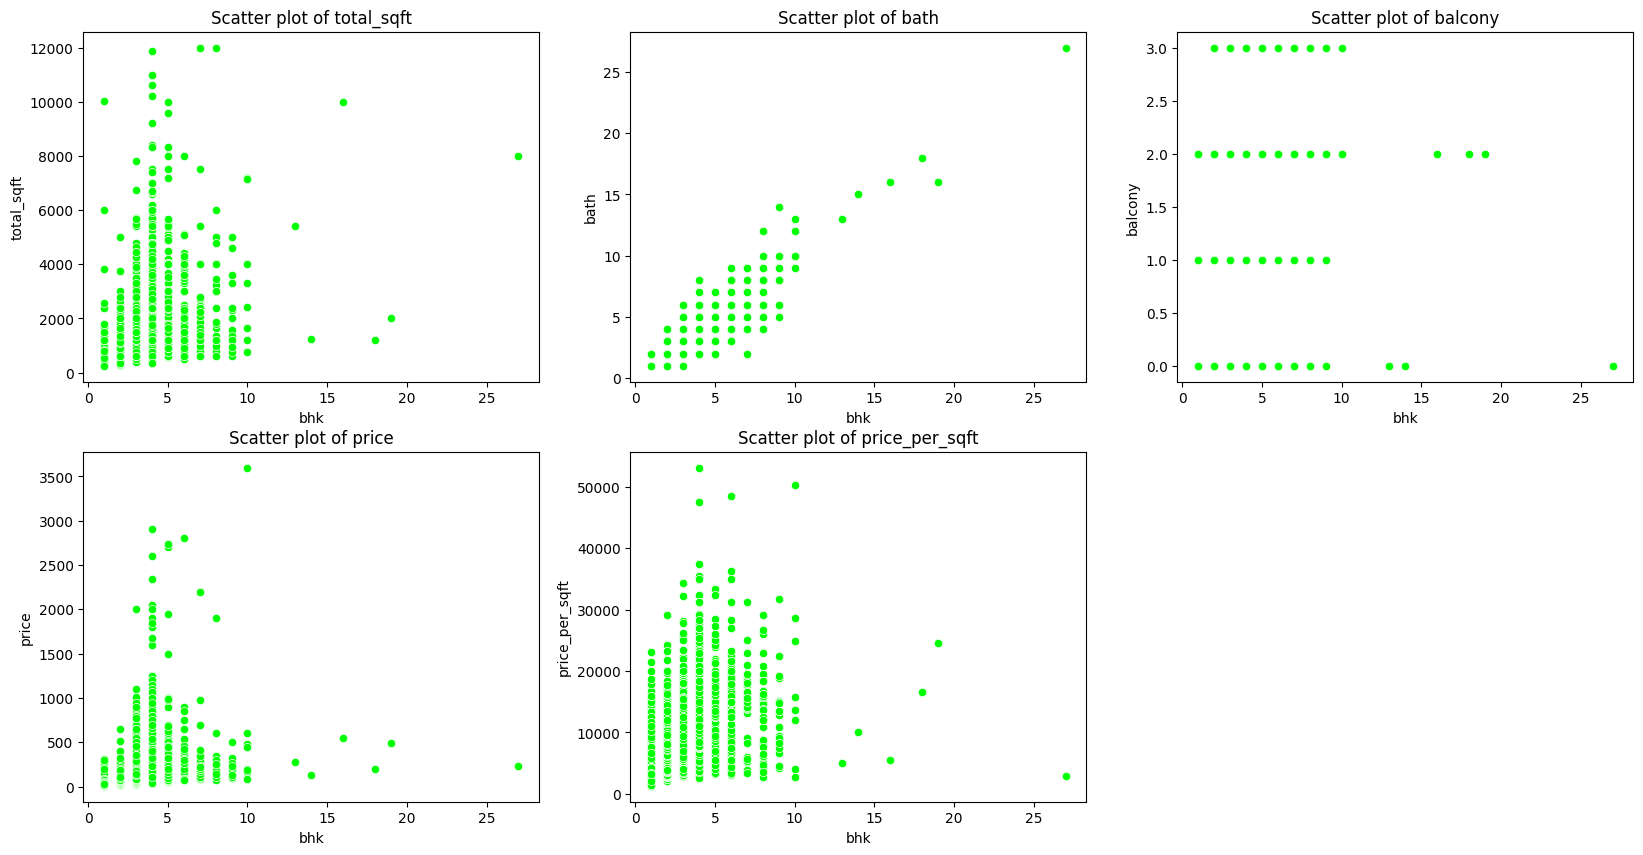

In [39]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df['bhk'],y=df[col],color='lime')
    plt.title(f'Scatter plot of {col}')

In [40]:
df.shape

(8040, 7)

In [41]:
df.drop(columns='price_per_sqft', inplace=True)

# Cleaned df

In [42]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4,1,428.0,4
1,1st Block Jayanagar,1630.0,3,2,194.0,3
2,1st Block Jayanagar,1200.0,6,2,125.0,6
3,1st Block Jayanagar,1875.0,2,3,235.0,3
4,1st Block Jayanagar,930.0,4,2,85.0,7


In [43]:
df.to_csv('Cleaned_df.csv')